In [2]:
import scipy as sp
import numpy as np
import imageio
import scipy.ndimage as nd
import matplotlib.pyplot as plt

In [3]:
face=imageio.imread('sample.png')

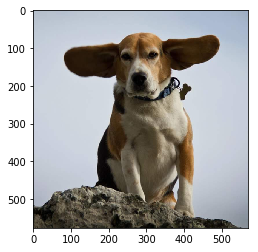

In [4]:
plt.imshow(face)

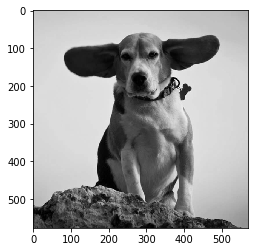

In [5]:
gray=imageio.imread('sample.png',pilmode='L')
plt.imshow(gray,cmap=plt.get_cmap('gray'))

In [6]:
face.shape

(577, 570, 4)

In [7]:
gray.shape

(577, 570)

In [8]:
LoG = nd.gaussian_laplace(gray, 2)
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1
            

In [16]:
LoG

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  0, ...,  0,  0,  0],
       [25, 35, 49, ...,  0,  0,  0]], dtype=uint8)

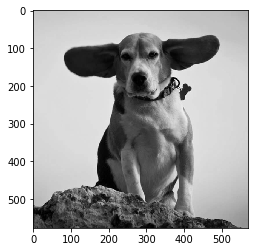

In [93]:
gray=imageio.imread('sample.png',pilmode='L')
plt.imshow(gray,cmap=plt.get_cmap('gray'))

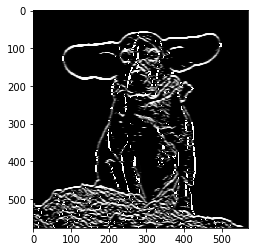

In [12]:
plt.imshow(LoG,cmap=plt.get_cmap('gray'))

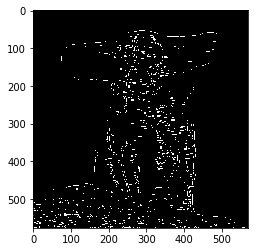

In [118]:
plt.imshow(output, cmap=plt.get_cmap('gray'))

In [66]:
output

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])